# a) load and preproces dataset 

In [28]:
import pandas as pd

folder = "datasets"

passengers_df = pd.read_csv(folder + "/gender_submission.csv")
train_df = pd.read_csv(folder + "/train.csv")
tests_df = pd.read_csv(folder + "/test.csv")

full_df = pd.concat([train_df, tests_df], ignore_index=True)
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


بررسی وابستگی میان داده ها

In [29]:
train_df.corr()

/tmp/ipykernel_10068/1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [30]:
train_df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

با توجه به اینکه برای هر فرد مجزا است و ربطی به نتیجه ندارد،بهتر است حذف شود

In [31]:
train_df.drop('Ticket', axis=1, inplace=True)

باید بقیه ستون هایی که تاثیری روی خروجی ندارد نیز حذف شود

In [32]:
train_df.drop('Cabin', axis=1, inplace=True)
train_df.drop('Name', axis=1, inplace=True)
train_df.drop('PassengerId', axis=1, inplace=True)

In [33]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [34]:
train_df.corr()

/tmp/ipykernel_10068/1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [35]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Problem! There are several records with age missing. The approach chosen to deal with it is just for test purpose. There are much more sophisticated techniques to predict a missing value 

In [36]:
import numpy as np

train_df['Age'].fillna(0,inplace=True) 

mean = train_df['Age'].mean()
std = train_df['Age'].std()

train_df['Age'] = np.where(train_df['Age'] == 0, (np.random.randint(mean - std,mean + std)), train_df['Age'])

In [37]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [38]:
full_df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

As cathegory "S" is the most common embark place, we will fill as "S" the empty Embark information of the 2 passengers who have this data missing 

In [39]:
top = 'S'
train_df['Embarked'].fillna(top,inplace=True) 
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [40]:
train_df["Sex"] = train_df["Sex"].map({"male":0,"female":1})
train_df["Embarked"] = train_df["Embarked"].map({"S":0,"C":1,"Q":2})
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


Encoding category columns

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_df.drop(["Survived"],axis="columns")
Y = train_df["Survived"] 

scaler = StandardScaler()
X= scaler.fit_transform(X)

# b)

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size = 0.8)
print(f'train: {X_train.shape}')
print(f'test: {X_test.shape}')

train: (712, 7)
test: (179, 7)



# c)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier()


param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2,3,5,7, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


grid = GridSearchCV(dtree, param_grid, cv=5)
grid.fit(X_train,Y_train)

grid.best_params_

{'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

# d)

In [44]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_dt = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split= 2) 
model_dt.fit(X_train,Y_train)

y_pred = model_dt.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1_score = f1_score(Y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1_score}")

Accuracy: 0.8156424581005587
Precision: 0.9130434782608695
Recall: 0.5915492957746479
F1 score: 0.717948717948718


# e)

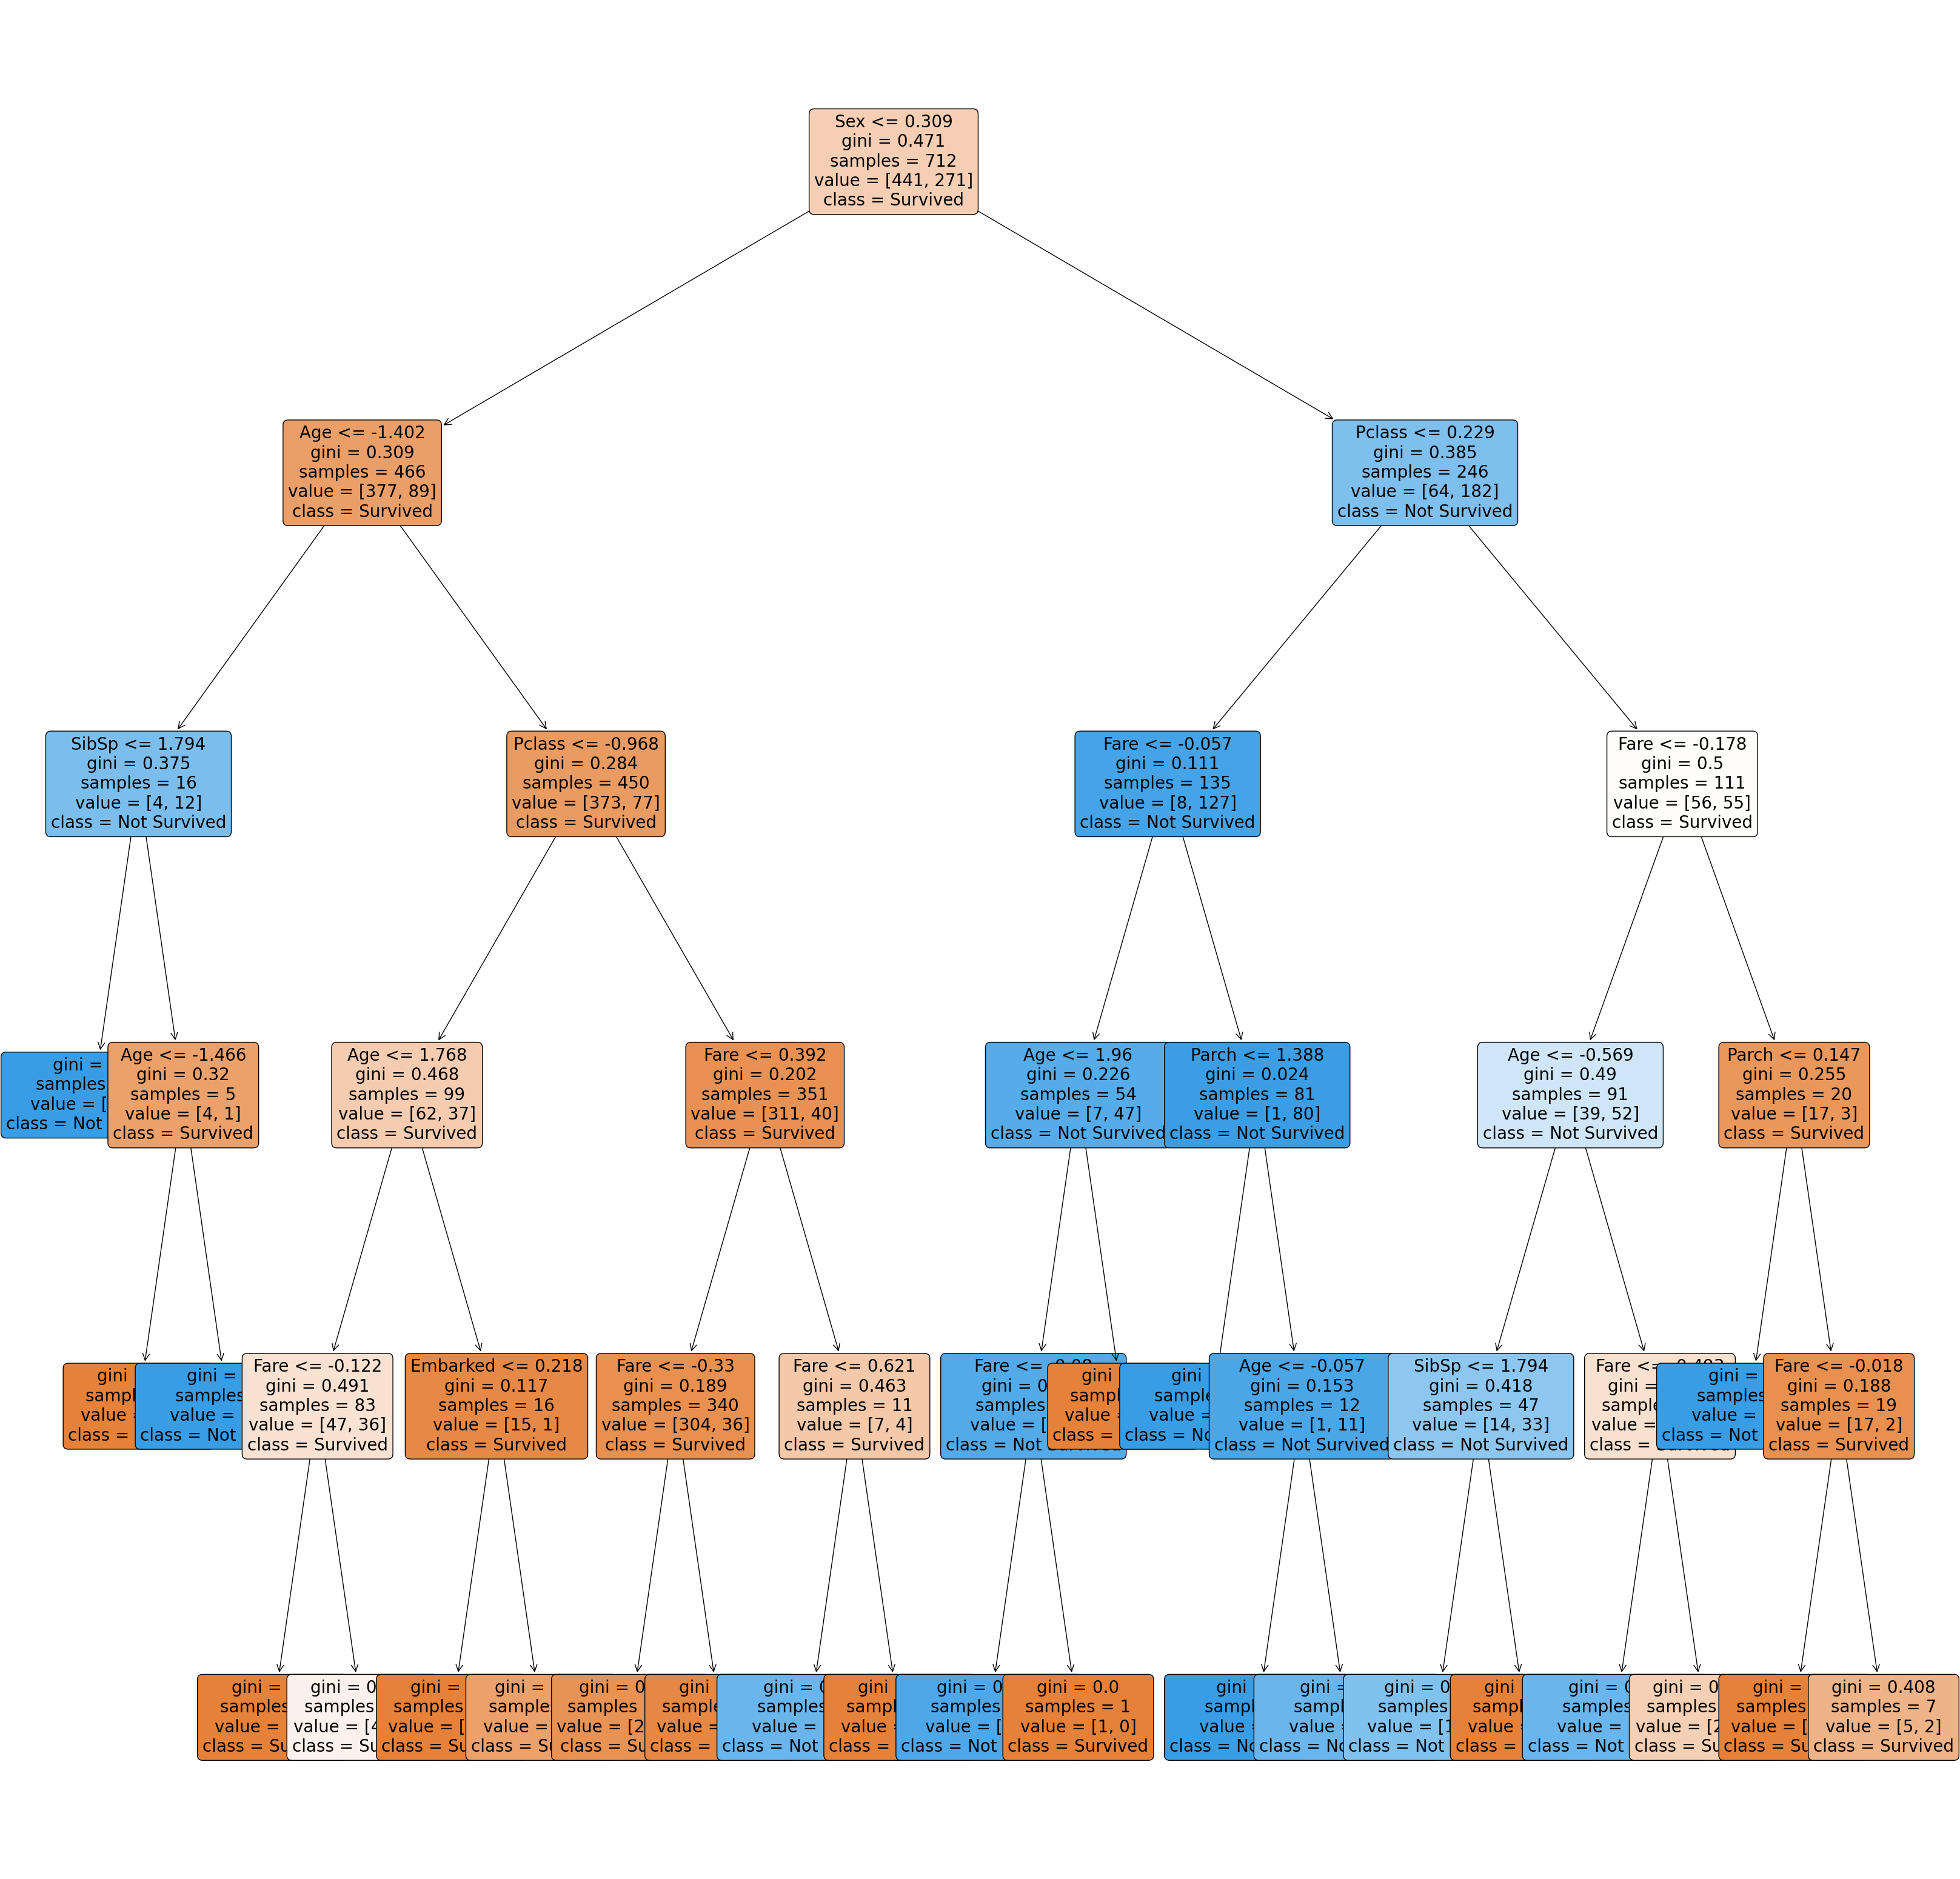

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40))
graph_tree = plot_tree (model_dt,feature_names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'],
                        class_names = ['Survived','Not Survived'],
                        filled=True,rounded=True,fontsize = 20)

# f)

In [46]:
dt = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split= 2) 

dt.fit(X_train, Y_train)
path = dt.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas

dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1,
                                min_samples_split=2, ccp_alpha=ccp_alpha)
    dt.fit(X_train, Y_train)
    dts.append(dt)

    
train_scores = [dt.score(X_train, Y_train) for dt in dts]
test_scores = [dt.score(X_test, Y_test) for dt in dts]

optimal_alpha = ccp_alphas[test_scores.index(max(test_scores))]

dt_pruned = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split= 2, ccp_alpha=optimal_alpha)
dt_pruned.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.004664248612969629, max_depth=5)

# g)

In [47]:


y_pred = dt_pruned.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
#f1_score = f1_score(Y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
#print(f"F1 score: {f1_score}")

Accuracy: 0.8379888268156425
Precision: 0.8387096774193549
Recall: 0.7323943661971831


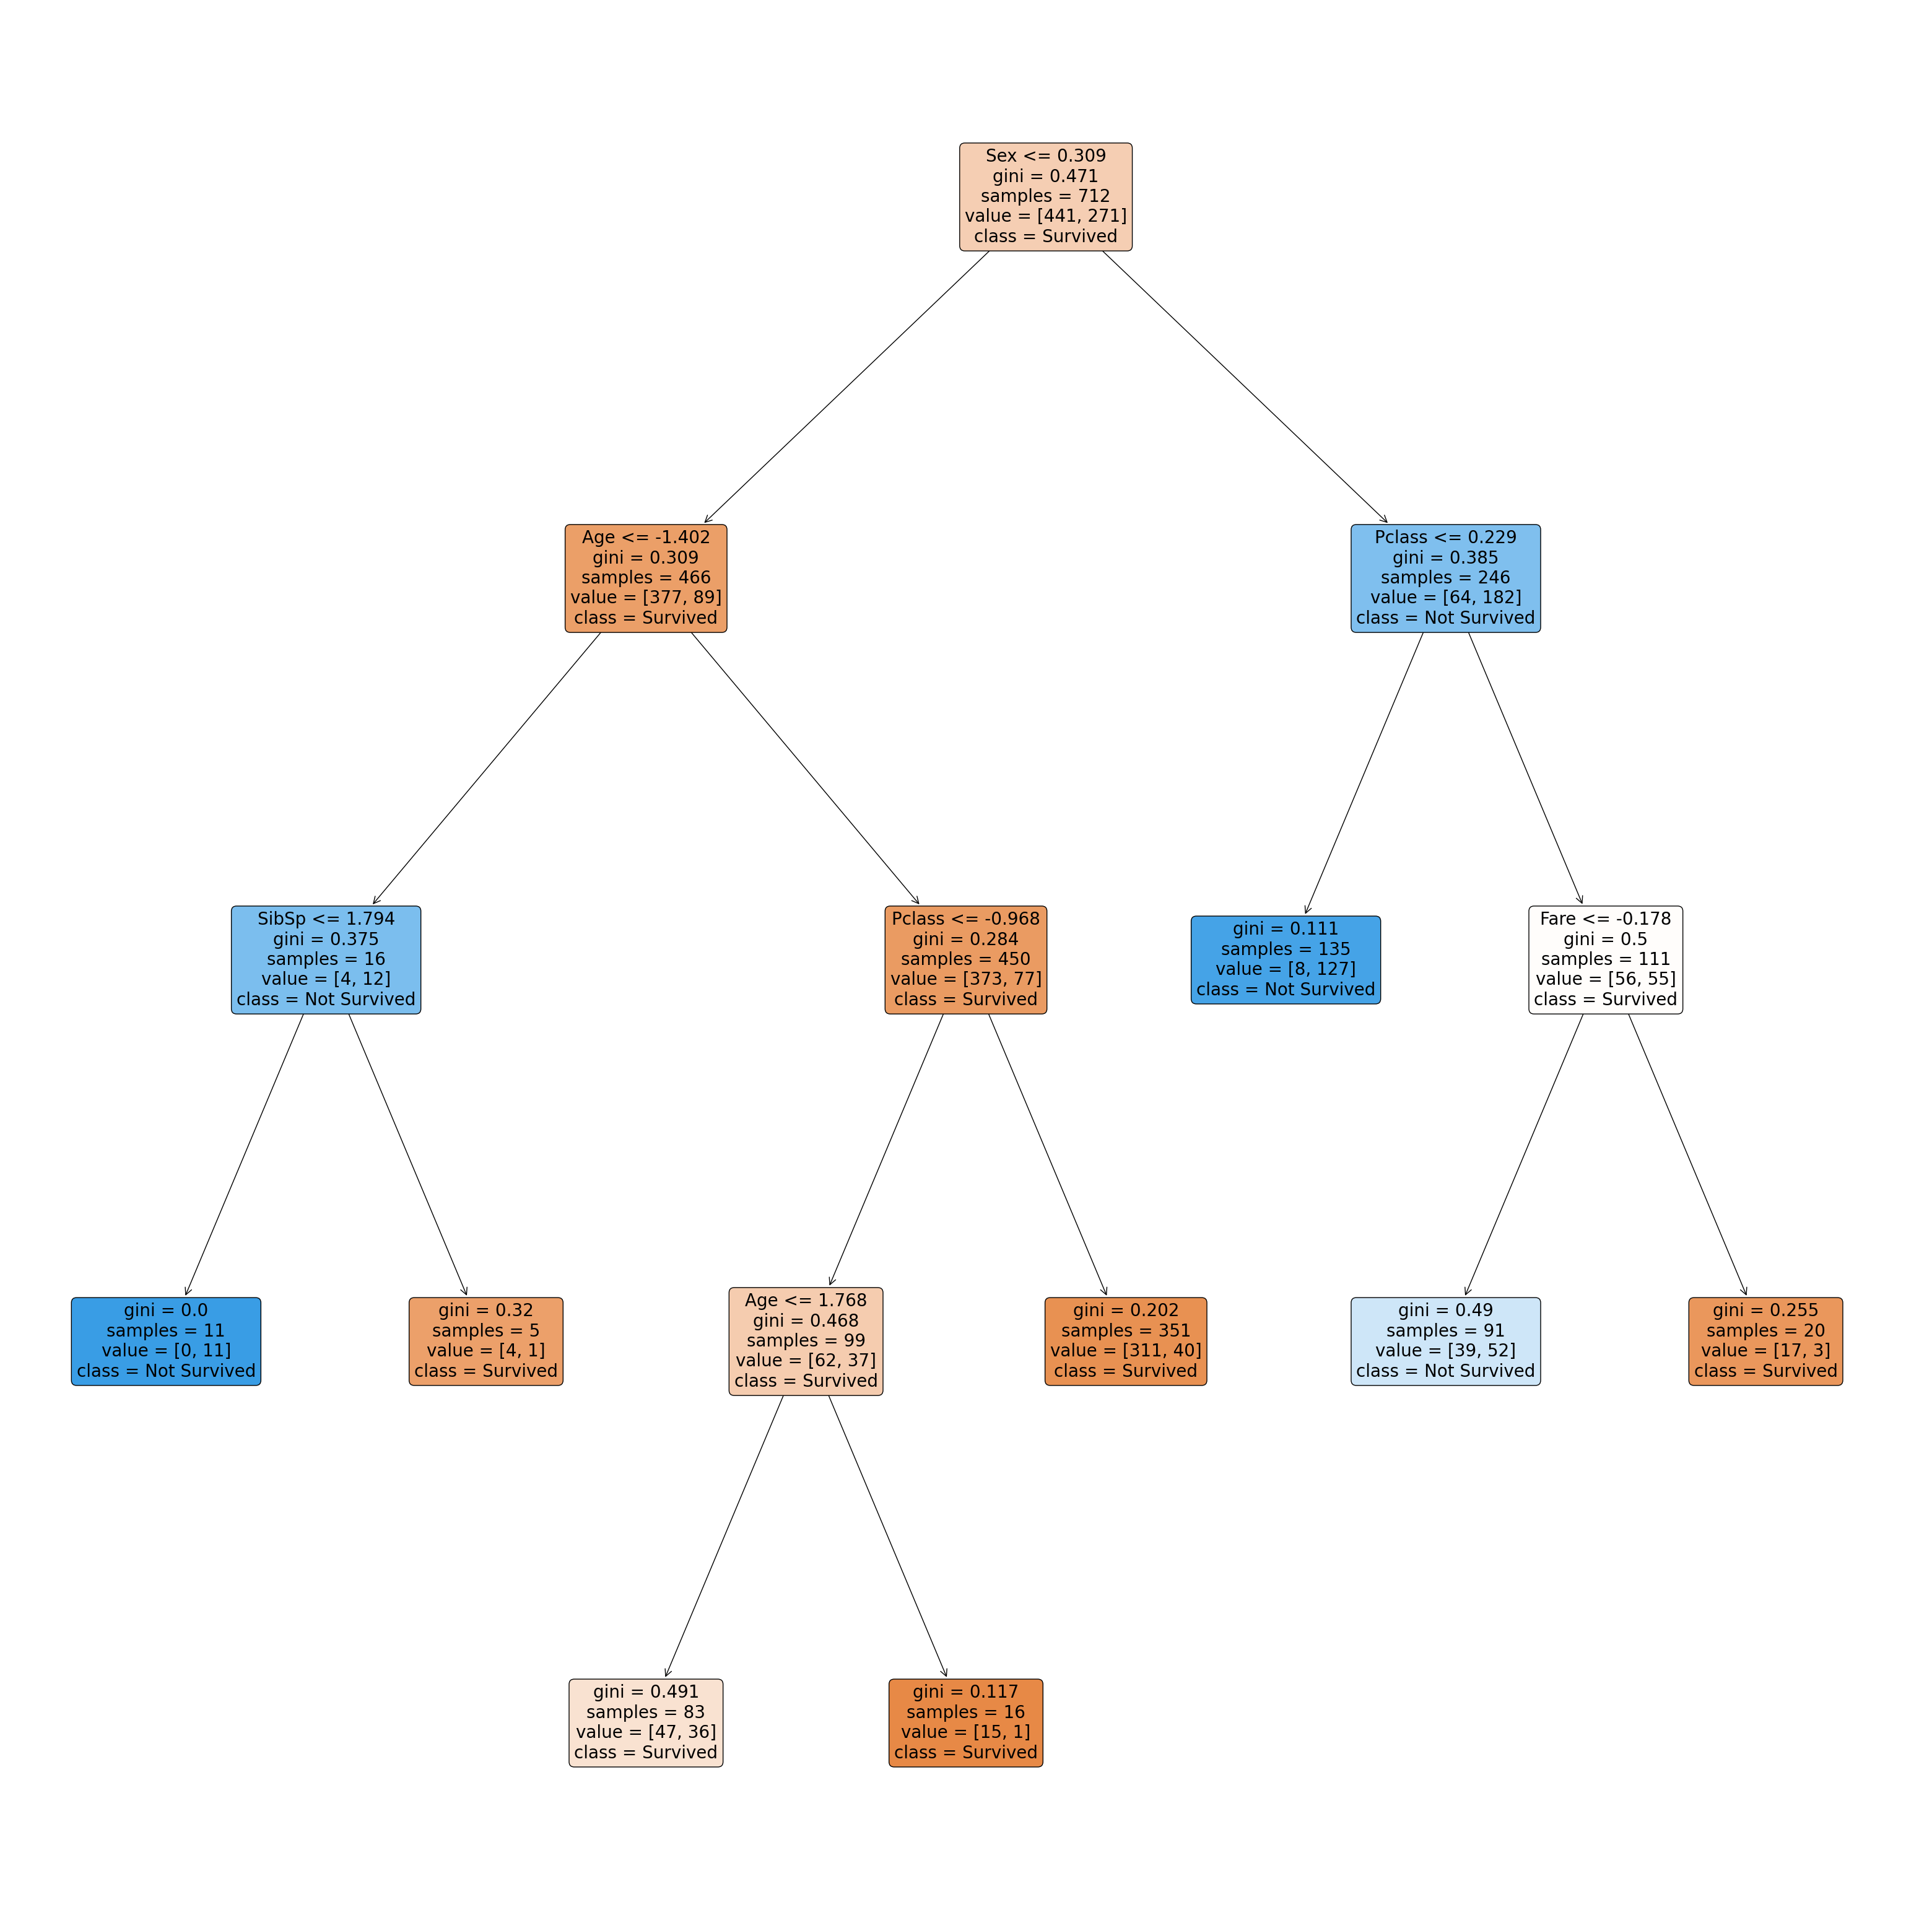

In [48]:
plt.figure(figsize=(40,40))
graph_tree = plot_tree (dt_pruned,feature_names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'],
                        class_names = ['Survived','Not Survived'],
                        filled=True,rounded=True,fontsize = 20)